# Ejercicio

Con Pandas: recupera los datos de 
https://drive.google.com/uc?export=download&id=10JJmUmZaDE8k8AQs2gKbPZGPmrIH6GQG
Identifica si hay valores faltantes o incorrectos. Utiliza matrix, bar y heatmap de missingno
para crear un visualización donde podamos ver en qué columnas y posiciones se encuentran esos datos. Interpreta estas visualizaciones.
Investiga y argumenta en clase:
1. Qué impacto puede tener la calidad de los datos en los objetivos que nos propongamos
2. Que técnicas debemos emplear para solucionarlo
3. Busca valores que puedan salirse de los esperado, con el fin de detectar valores incorrectos.
4. Sigue las explicaciones en clase con el proyecto de Naciones Unidas y replicalo en un Jupyter Notebook

In [1]:
import pandas as pd

In [2]:
# Lectura de los datos
df = pd.read_csv("https://drive.google.com/uc?export=download&id=10JJmUmZaDE8k8AQs2gKbPZGPmrIH6GQG")
df

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2773168
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,18092026
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5418377
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8791092


In [4]:
!pip install missingno

<Axes: >

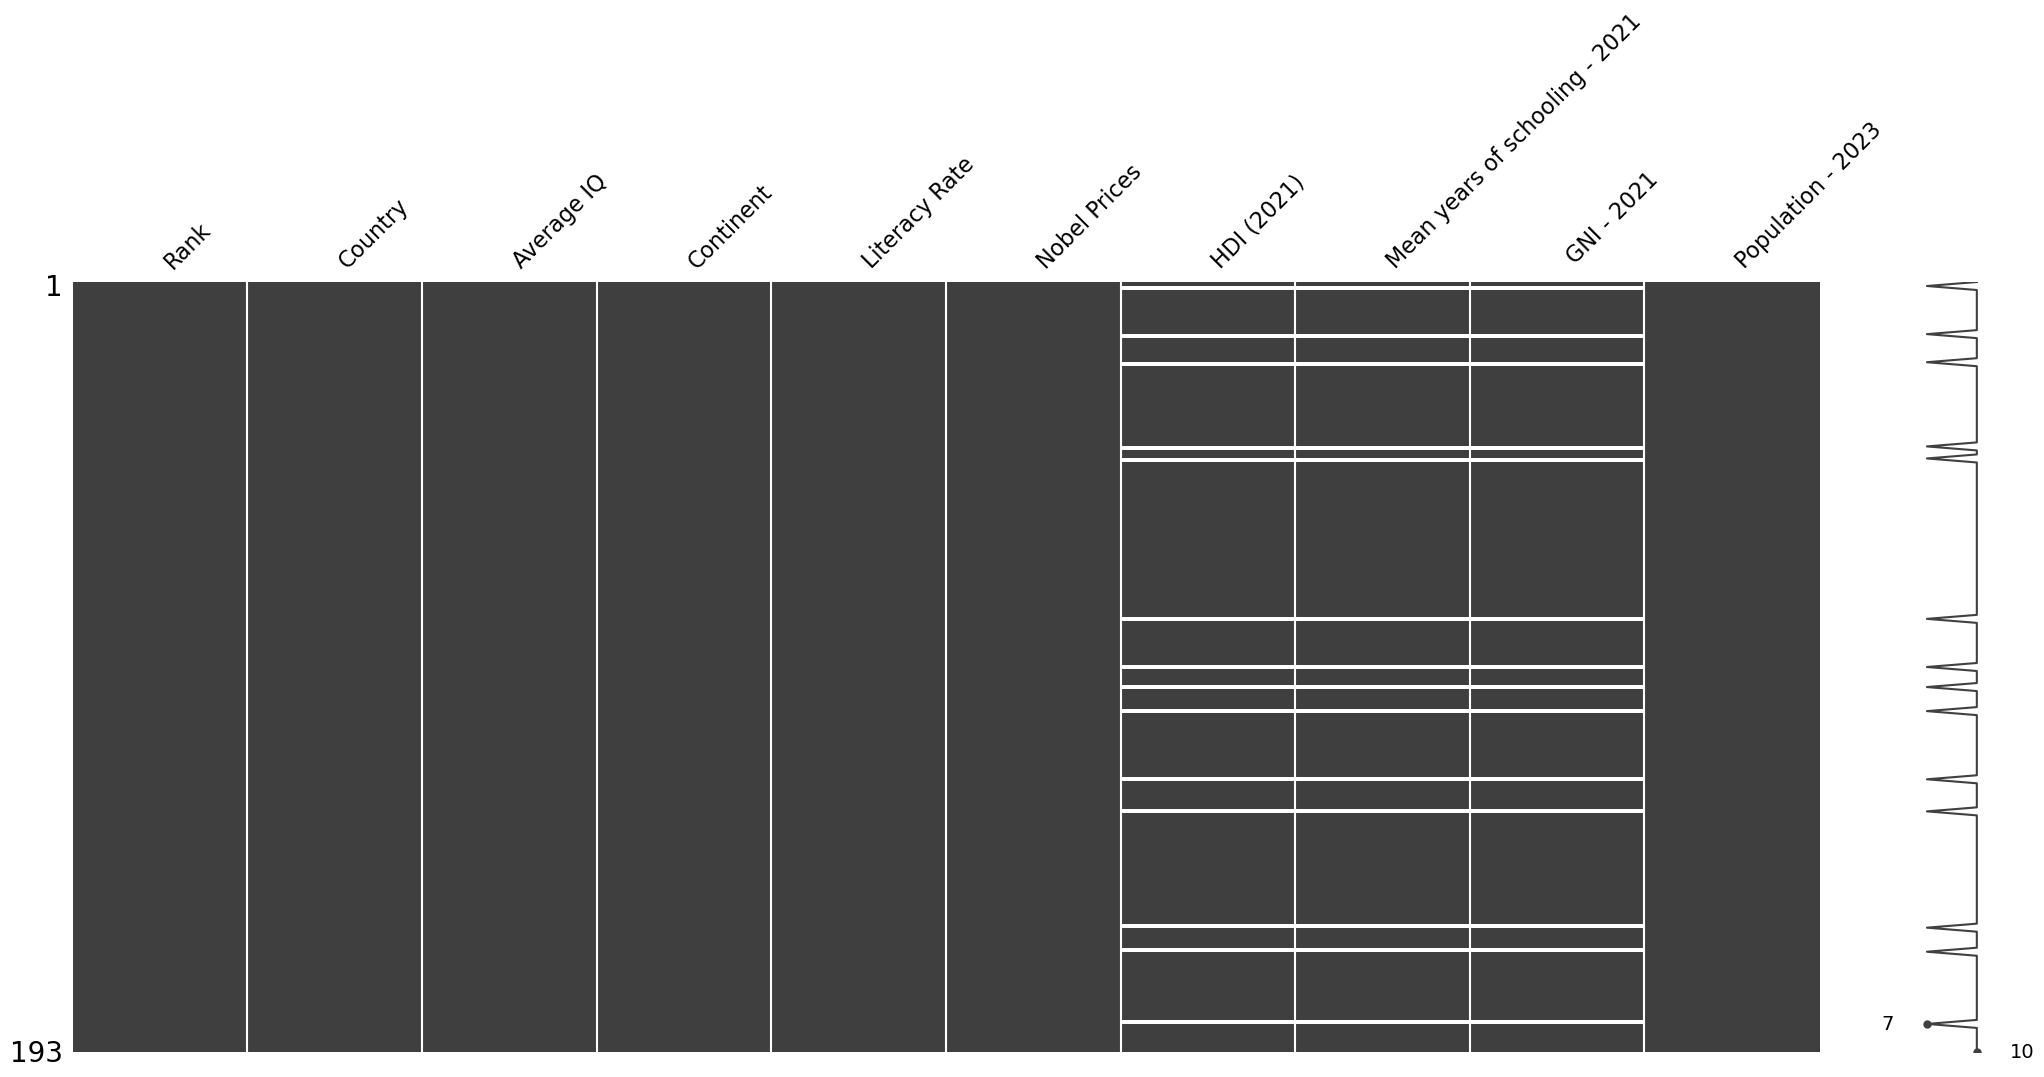

In [5]:
# Visualización con Missingno

import missingno as msno

#visualización de la matriz de valores nulos
msno.matrix(df)

Como se puede ver en la imagen anterior, hay 3 variables con valores faltantes:
- HDI (2021)
- Mean years of schooling - 2021
- GNI - 2021

Dichos valores faltantes están en los mismos registros

<Axes: >

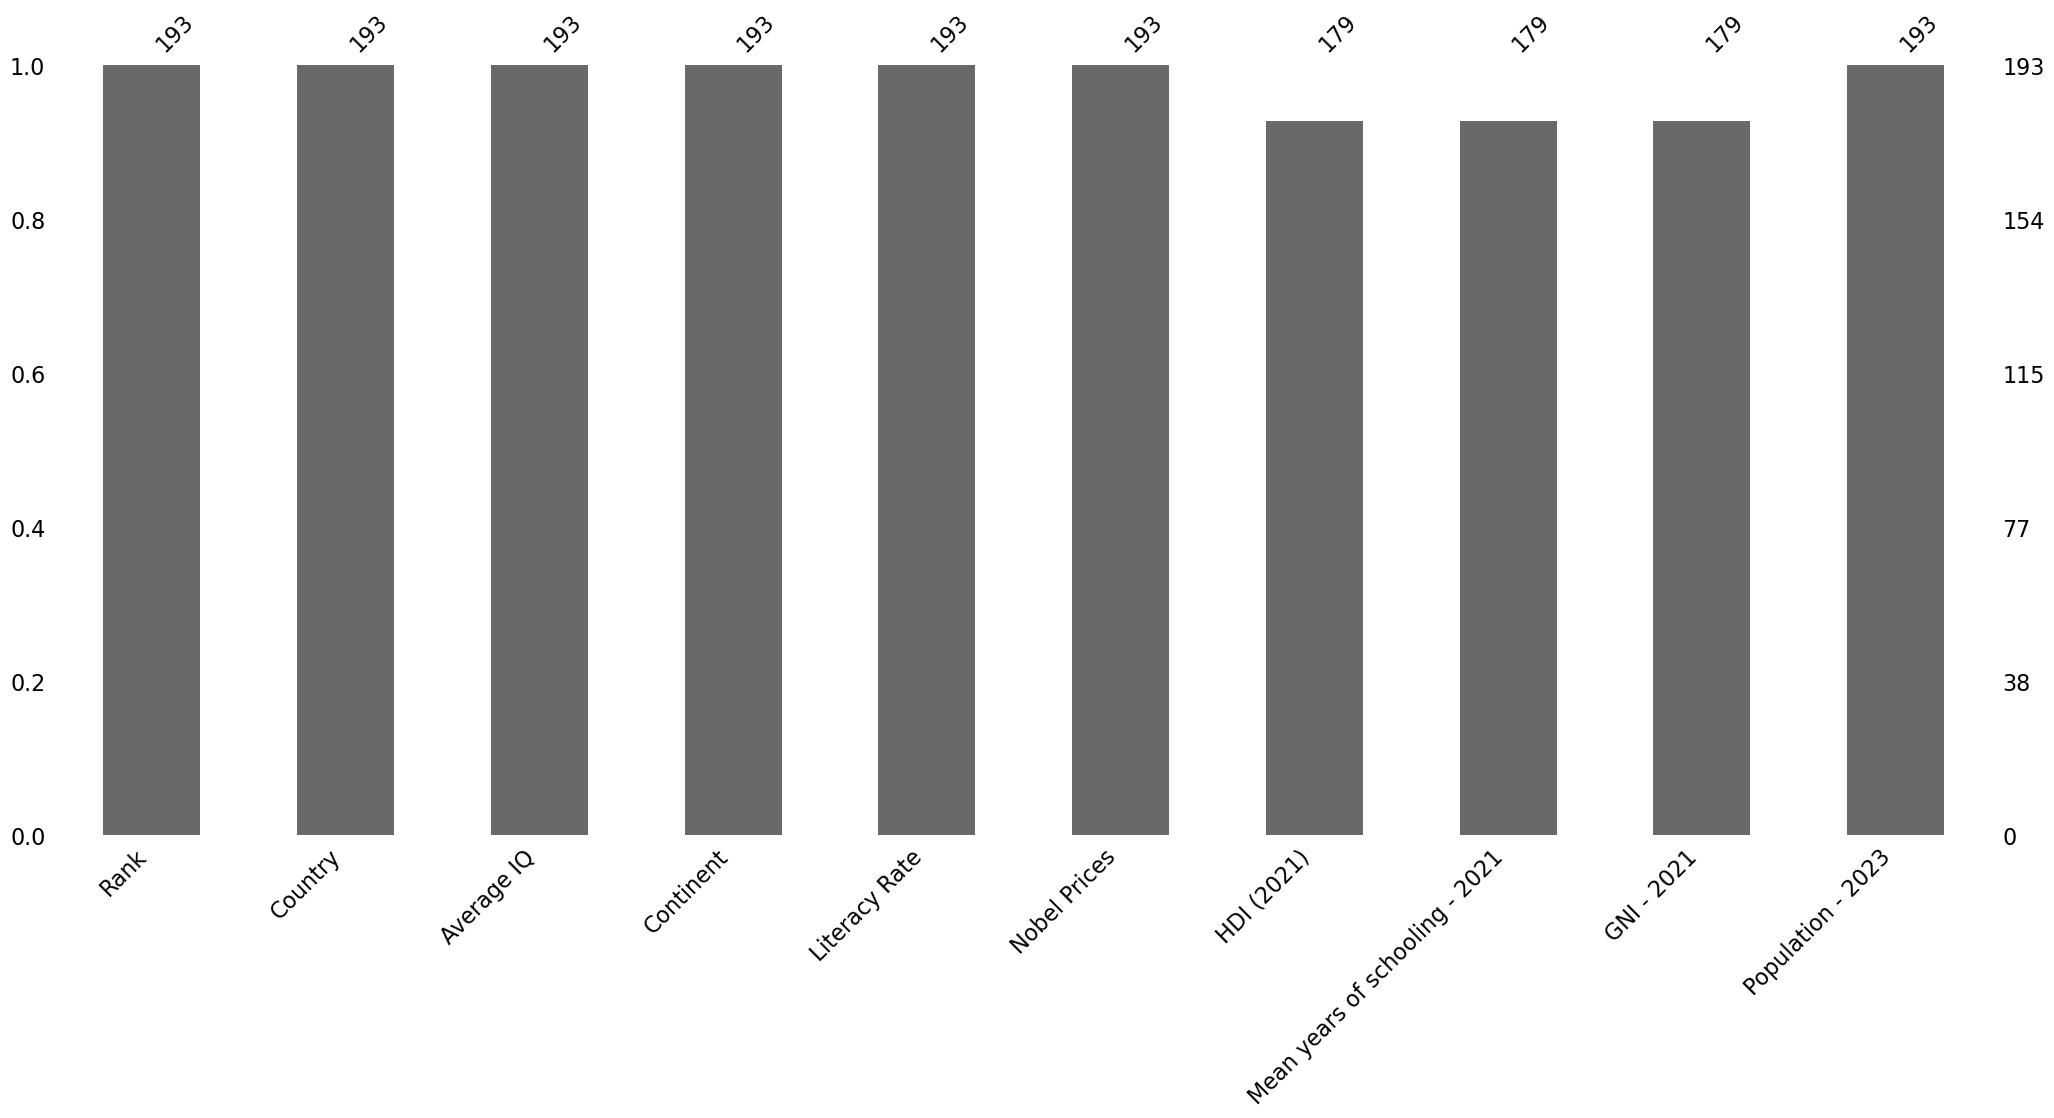

In [6]:
#visualización de la barra de valores nulos
msno.bar(df)

<Axes: >

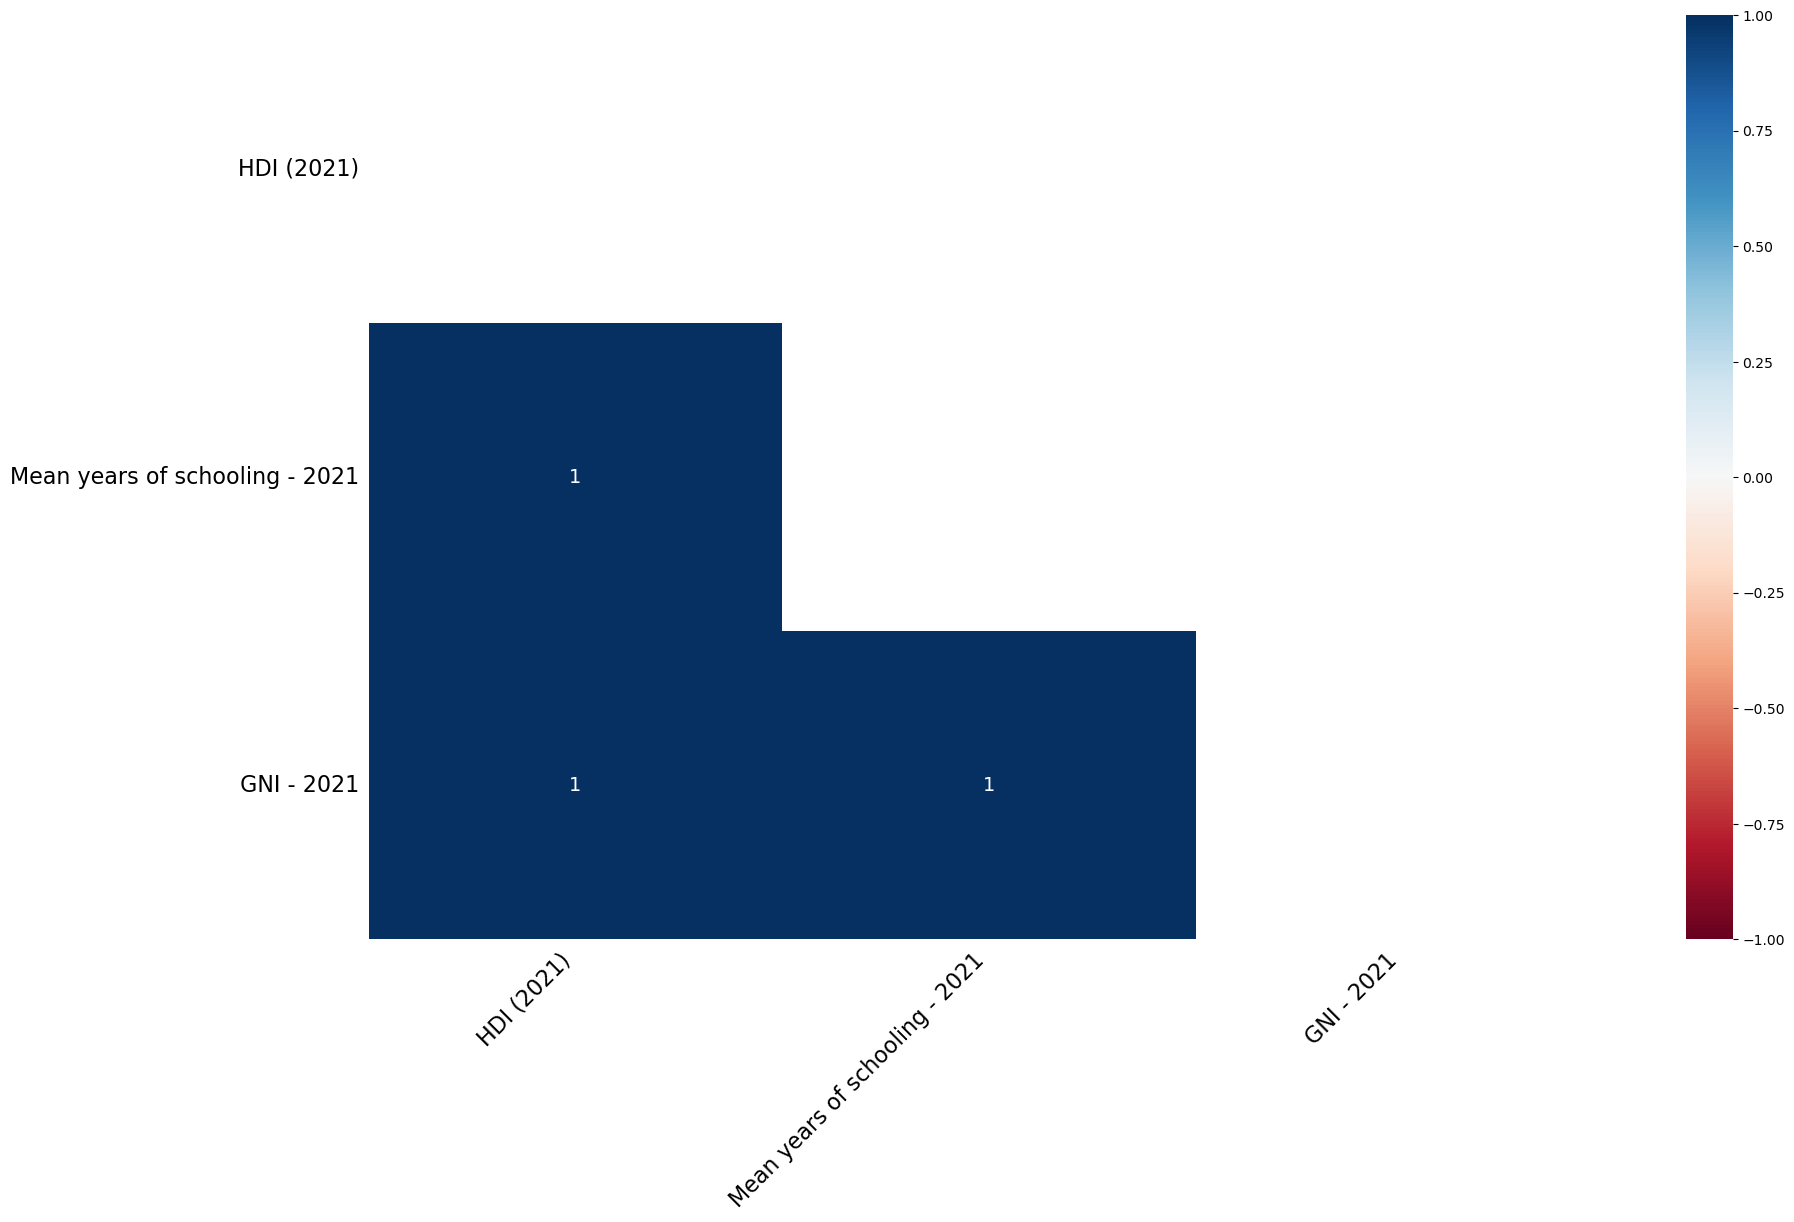

In [7]:
#visualización del mapa de calor de los valores nulos
msno.heatmap(df)

1. Qué impacto puede tener la calidad de los datos en los objetivos que nos propongamos

Los datos incompletos o incorrectos pueden afectar de manera muy negativa cualquier análisis o modelo que se realice, ya que puede haber pérdida de información valiosa o datos incorrectos los cuales pueden llevar a interpretaciones erróneas.

2. Que técnicas debemos emplear para solucionarlo

Respecto a los valores faltantes, se pueden emplear técnicas como la imputación (con la media o mediana, por ejemplo) o eliminación. Siempre hay que entender por qué faltan datos.

3. Busca valores que puedan salirse de los esperado, con el fin de detectar valores incorrectos.

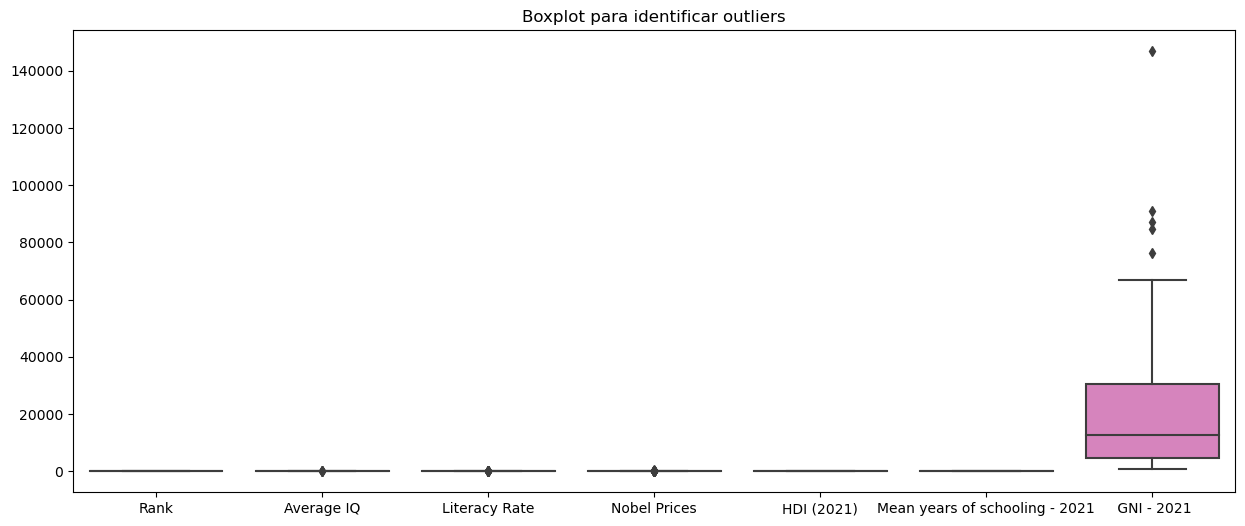

In [9]:
# Uso de boxplot para visualizar los valores atípicos

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title("Boxplot para identificar outliers")
plt.show()

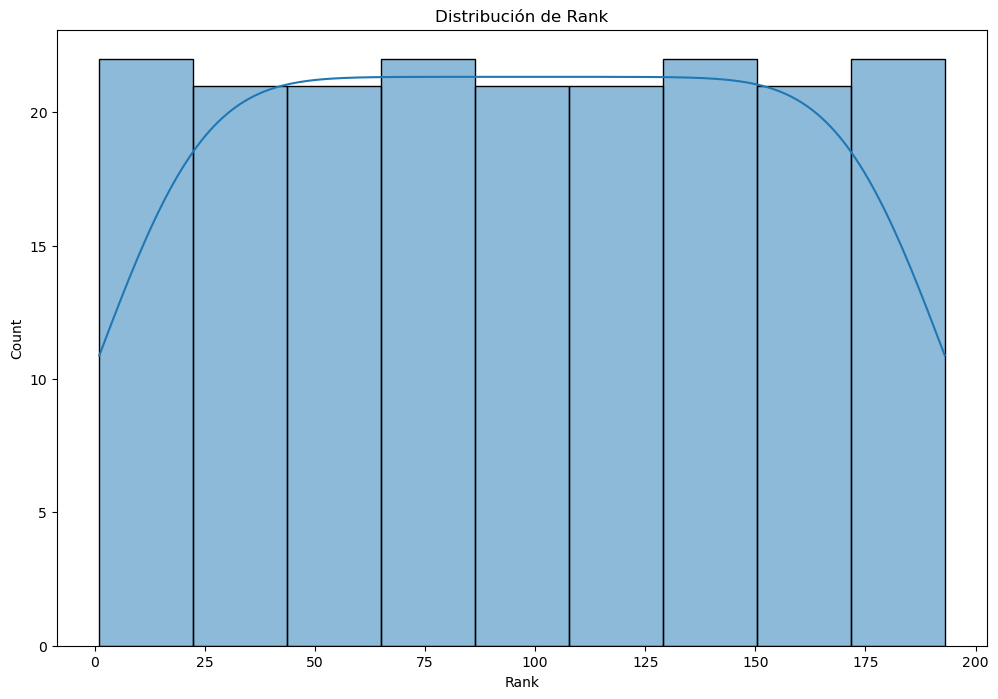

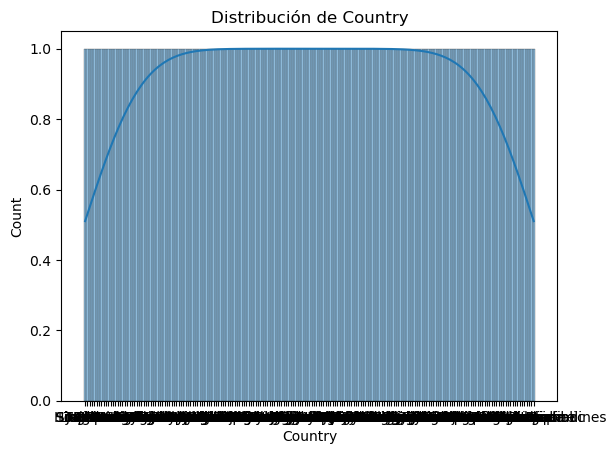

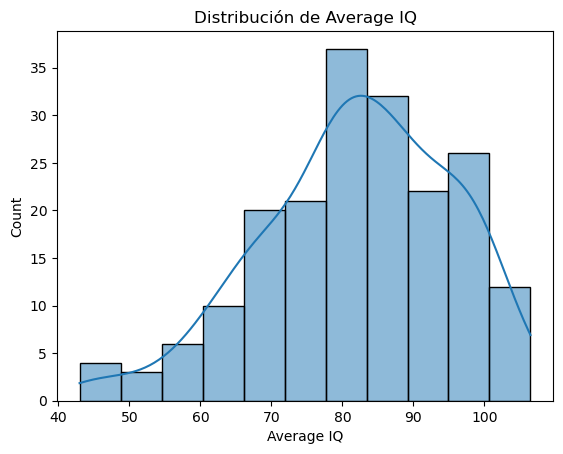

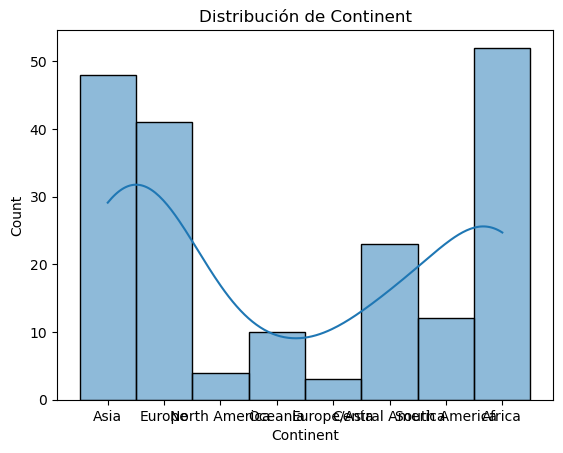

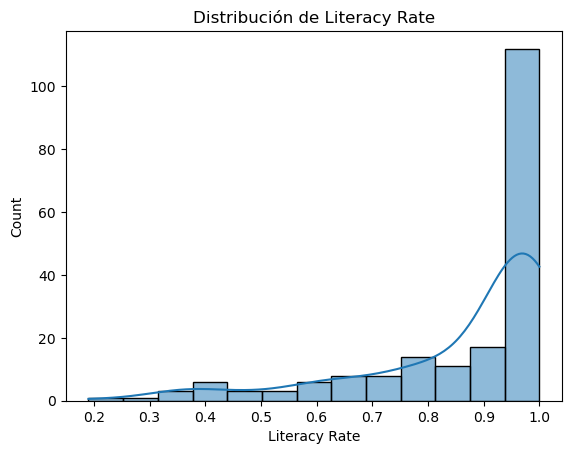

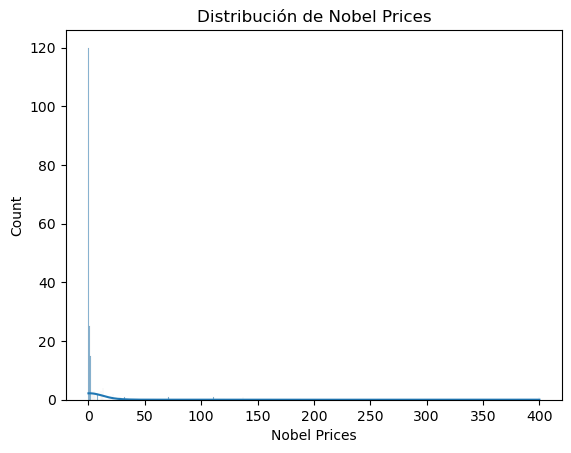

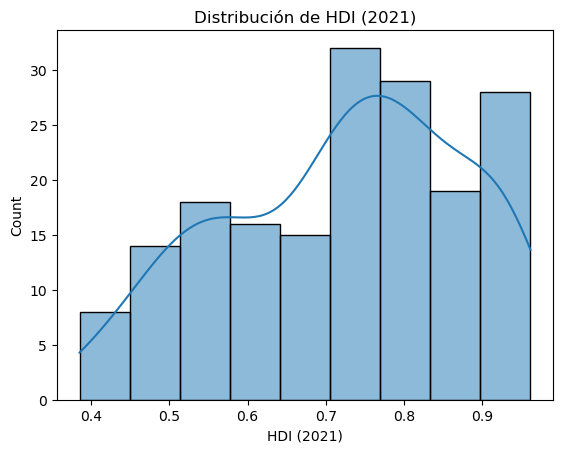

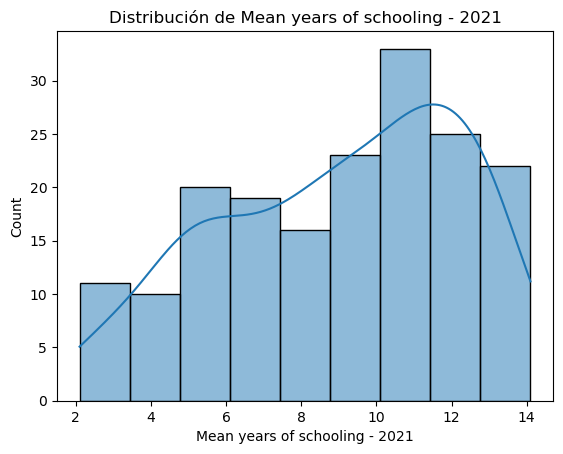

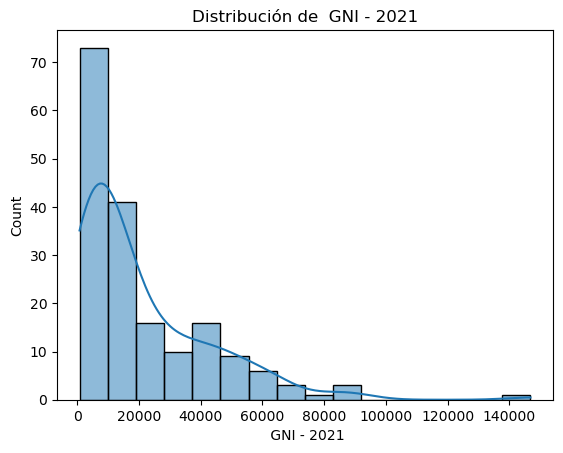

/Users/n.c.rodriguez/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


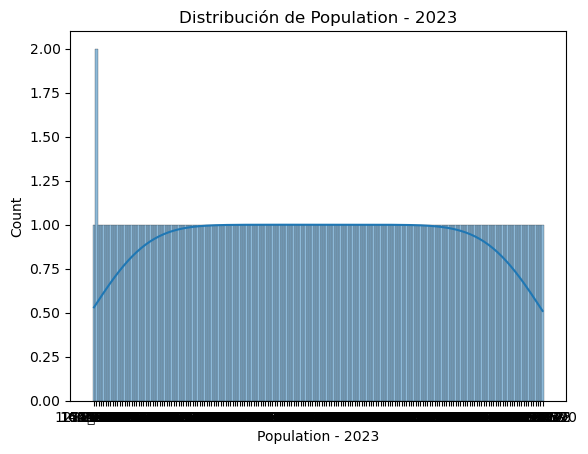

In [12]:
# Histograma de cada columna para visualizar valores atípicos

plt.figure(figsize=(12, 8))
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

In [11]:
# Identificación de valores atípicos mediante percentiles

percentiles = df.describe(percentiles=[0.25, 0.5, 0.75])
percentiles

,Rank,Average IQ,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021
count,193.000000,193.000000,193.000000,193.000000,179.000000,179.000000,179.000000
mean,97.000000,82.047927,0.864249,5.922280,0.724123,9.028492,20811.798883
std,55.858452,13.336117,0.180262,31.971328,0.152761,3.187867,22160.494888
min,1.000000,42.990000,0.190000,0.000000,0.385000,2.100000,732.000000
25%,49.000000,74.330000,0.800000,0.000000,0.599500,6.400000,4593.000000
50%,97.000000,82.240000,0.950000,0.000000,0.745000,9.400000,12672.000000
75%,145.000000,91.600000,0.990000,1.000000,0.844000,11.600000,30588.000000
max,193.000000,106.480000,1.000000,400.000000,0.962000,14.100000,146830.000000


Interpretación:
- Rank: Esta columna parece ser solo un índice o un identificador de posición. Los percentiles no tienen mucha relevancia aquí.

- Average IQ: El 25% de los países tienen un coeficiente intelectual (IQ) por debajo de 74.33, el 50% (mediana) está por debajo de 82.24 y el 75% está por debajo de 91.60. El IQ mínimo es de 42.99 y el máximo es de 106.48.

- Literacy Rate: El 25% de los países tienen una tasa de alfabetización inferior al 80%, el 50% (mediana) está por debajo del 95%, y el 75% está por debajo del 99%. El rango va desde 19% hasta 100%.

- Nobel Prices: Este parece ser un conteo discreto. El 25% de los países no tiene premios Nobel, el 50% no tiene premios Nobel, y el 75% tiene 1 o menos premios Nobel. El máximo es 400, lo que podría ser un valor atípico o un error en los datos, ya que normalmente los premios Nobel no se cuentan de esta manera.

- HDI (2021): El Índice de Desarrollo Humano (HDI) varía desde 0.385 hasta 0.962. Los percentiles indican que el 25% de los países tienen un HDI inferior a 0.5995, el 50% tiene un HDI inferior a 0.745, y el 75% tiene un HDI inferior a 0.844.

- Mean years of schooling - 2021: La media de años de escolaridad varía desde 2.1 hasta 14.1 años. Los percentiles indican que el 25% de los países tienen una media de años de escolaridad inferior a 6.4, el 50% tiene una media inferior a 9.4, y el 75% tiene una media inferior a 11.6.

- GNI - 2021: El Ingreso Nacional Bruto (GNI) varía desde 732 hasta 146,830. Los percentiles indican que el 25% de los países tienen un GNI inferior a 4593, el 50% tiene un GNI inferior a 12672, y el 75% tiene un GNI inferior a 30588.